# Diabetes Prediction 

### Importing all the required libraries

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.simplefilter("ignore")
%matplotlib inline

### About dataset

#### The datasets consists of several medical predictor variables and one target variable,  Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI,Blood Pressure Level Glucose level insulin level, age, Skin Thickness and Diabetes Pedigree Function
#### Pregnancies :                           Number of times pregnant
#### Glucose :                                  Plasma glucose concentration a 2 hours in an oral glucose tolerance test
#### BloodPressure :                       Diastolic blood pressure (mm Hg)
#### SkinThickness :                       Triceps skin fold thickness (mm)
#### Insulin :                                     2-Hour serum insulin (mu U/ml)
#### BMI :                                          Body mass index (weight in kg/(height in m)^2)
#### DiabetesPedigreeFunction:    Diabetes pedigree function
#### Age:                                           Age (years)
#### Outcome:                                  Class variable (0 or 1) 268 of 768 are 1, the others are 0

### Loading data set 

In [14]:
data=pd.read_csv("diabetes_data.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Checking for missing  values

In [15]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### From the above we can observe that there is no missing value in dataset 

### Now we have to check if there are any 0's in the set

In [16]:
data.isin([0]).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

### there are a lot of zeros and 0's in glucose,BP,BMI is not logical
### We need to fill these 0's with some appropirate values

In [17]:
data.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

###  The Outcome is not Balanced

### Replace all zeros with NANs. so that when means are calculated, zeros are not counted.

In [18]:
data_na=data.replace({'Glucose':0,'BloodPressure' : 0,'SkinThickness' : 0,'BMI' : 0 ,'Insulin' : 0,},np.NaN)                     


data_na.isin([0]).sum()

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

### Calcutating the mean of each columns

In [19]:
data_na.mean()


Pregnancies                   3.845052
Glucose                     121.686763
BloodPressure                72.405184
SkinThickness                29.153420
Insulin                     155.548223
BMI                          32.457464
DiabetesPedigreeFunction      0.471876
Age                          33.240885
Outcome                       0.348958
dtype: float64

####  Replace this NaN with mean 

In [20]:
data_na.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [21]:
data_na=data.fillna(data.mean())
data_na.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [22]:
data_na.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [23]:
data_na.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Creating a Heatmap

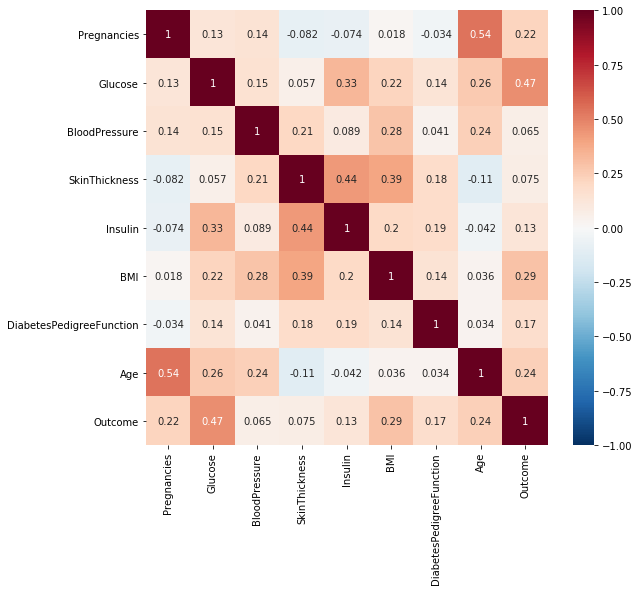

In [27]:
correlation=data_na.corr()
f,ax=plt.subplots(figsize=(9,8))
ax=sns.heatmap(correlation,annot=True,linewidths=0,vmin=-1,cmap="RdBu_r")

### sorting the features according to there effcts on outcome

In [28]:
correlation["Outcome"].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64

### we can see that glucose and BMI having the greatest effect on outcome

## ploting histogram for each feature


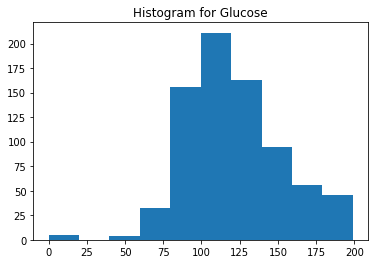

In [29]:
x = data_na.Glucose
plt.hist(x)
plt.title('Histogram for Glucose')
plt.show()

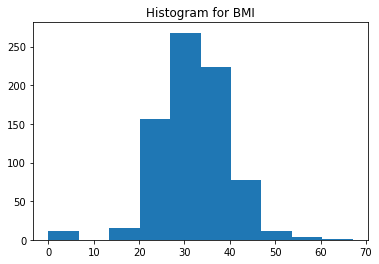

In [30]:
x = data_na.BMI
plt.hist(x)
plt.title('Histogram for BMI')
plt.show()

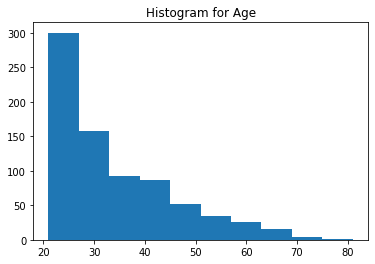

In [31]:
x = data_na.Age
plt.hist(x)
plt.title('Histogram for Age')
plt.show()

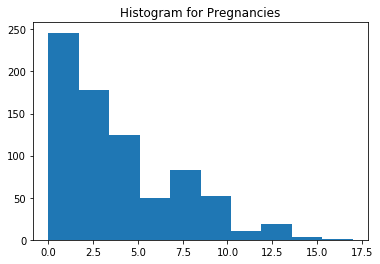

In [32]:
x = data_na.Pregnancies
plt.hist(x)
plt.title('Histogram for Pregnancies')
plt.show()

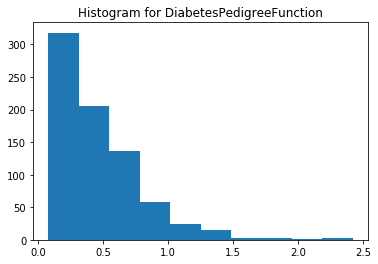

In [33]:
x = data_na.DiabetesPedigreeFunction
plt.hist(x)
plt.title('Histogram for DiabetesPedigreeFunction')
plt.show()

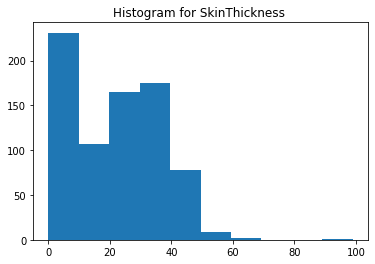

In [34]:
x = data_na.SkinThickness
plt.hist(x)
plt.title('Histogram for SkinThickness ')
plt.show()

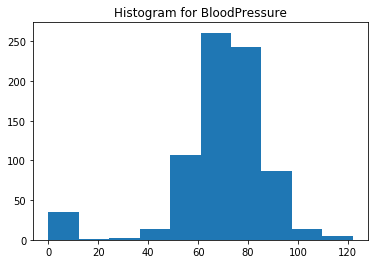

In [35]:
x = data_na.BloodPressure
plt.hist(x)
plt.title('Histogram for BloodPressure')
plt.show()

## extracting feature variables and target variable


In [36]:
x=data_na.drop(['Insulin','BMI','DiabetesPedigreeFunction'],axis=1)

In [37]:
x=data_na[['Pregnancies','Glucose','Insulin','BMI','DiabetesPedigreeFunction', 'Age']]
y=data_na['Outcome']

### Creating Train_Test_Split Data

In [51]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

###  Using Logistic regression

In [52]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [53]:
model.predict(x_test)

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1],
      dtype=int64)

In [54]:
model.score(x_test,y_test)

0.7987012987012987

### Using Decision Tree Classifier

In [55]:
from sklearn import tree

In [56]:
model=tree.DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [57]:
model.score(x_test,y_test)

0.7727272727272727

### Using Random Forest Classifier

In [58]:
from sklearn.ensemble import RandomForestClassifier

In [59]:
model=RandomForestClassifier(n_estimators=100)
model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [60]:
model.score(x_test,y_test)

0.7727272727272727

### Using SVM 

In [61]:
from sklearn.svm import SVC

In [62]:
model=SVC(C=700)
model.fit(x_train,y_train)

SVC(C=700, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [63]:
model.score(x_test,y_test)

0.8051948051948052

#### From above the accuracy score of SVM and Logistic regression is higher than other models .
#### We can't rely on this result as it will change every time when train and test data changes everytime.
#### so we will use cross validation to get the result on which we can rely.
#### I am using cross validation using Stratified k fold.


## cross validation using Stratified k fold

In [64]:
from sklearn.model_selection import StratifiedKFold
def skf(model,a,b):
    f=StratifiedKFold(n_splits=30)
    scores=[]
    for train_index,test_index in f.split(a,b):
        x_train ,x_test,y_train,y_test=a.iloc[train_index],a.iloc[test_index],b.iloc[ train_index],b.iloc[test_index]
        model.fit(x_train,y_train)
        scores.append(model.score(x_test,y_test))
    return scores

###  Using Logistic regression

In [65]:
np.array(skf(LogisticRegression(),x,y)).mean()

0.7684615384615386

### Using Decision Tree Classifier

In [66]:
np.array(skf(tree.DecisionTreeClassifier(),x,y)).mean()

0.7003589743589747

### Using Random Forest Classifier

In [67]:
np.array(skf(RandomForestClassifier(n_estimators=100),x,y)).mean()


0.7514871794871796

### Using SVM

In [68]:
np.array(skf(SVC(C=100),x,y)).mean()

0.7515384615384614

## So the maximum accuracy we get from  Logistic regression